In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

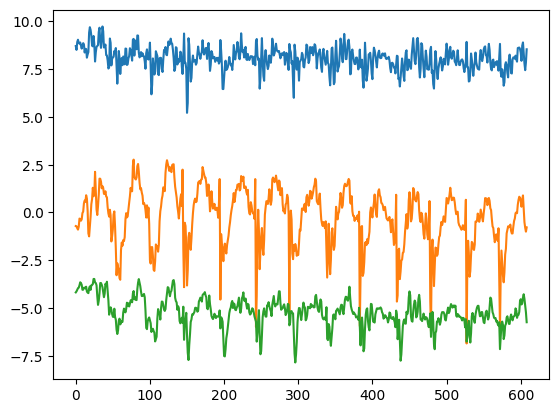

In [ ]:
RutaFile="/content/gdrive/MyDrive/Universidad/Procesamiento Datos Secuenciales/proyecto_1/wash_teeth_classifier-export/training/front_correct.4e5grbs1.ingestion-65df76d555-5lqbs.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Universidad/Procesamiento Datos Secuenciales/proyecto_1/wash_teeth_classifier-export/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*600,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*600:(i+1)*600] = DatosOriNP[0:600]
  i+=1
print(Datos.shape)



(54000, 3)


In [ ]:
print(files)

['front_correct.4e5gh6bf.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gkaof.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gkrtl.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gldia.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gltur.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gn3pl.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gnkad.ingestion-65df76d555-xrbth.json', 'front_correct.4e5grbs1.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5grr29.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gsbj4.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gss36.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gt9lj.ingestion-65df76d555-xrbth.json', 'front_correct.4e5guebr.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gvdop.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gvsbs.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5h17rr.ingestion-65df76d555-xrbth.json', 'front_correct.4e5h1p38.ingestion-65df76d555-dxvr4.json', 'front_correc

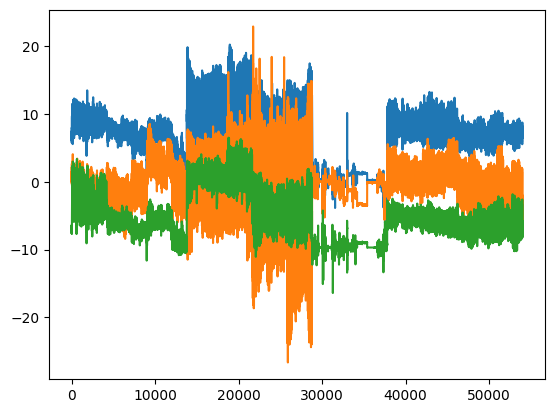

In [ ]:
plt.plot(Datos)

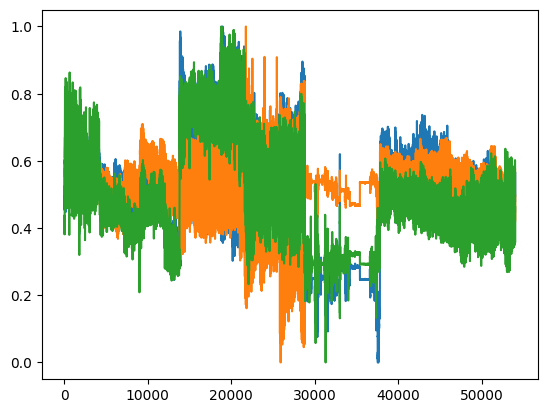

In [ ]:
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [ ]:
Xtrain=np.zeros((90,600, 3))

#for i in range(90):
 #   Xtrain[i,:]=np.concatenate((Datos[i*600:(i+1)*600,0].T,Datos[i*600:(i+1)*600,1].T,Datos[i*600:(i+1)*600,2].T),axis=0)

for i in range(90):
  Xtrain[i,:,0]=Datos[i*600:(i+1)*600,0].T
  Xtrain[i,:,1]=Datos[i*600:(i+1)*600,1].T
  Xtrain[i,:,2]=Datos[i*600:(i+1)*600,2].T

print(Xtrain.shape)


(90, 600, 3)


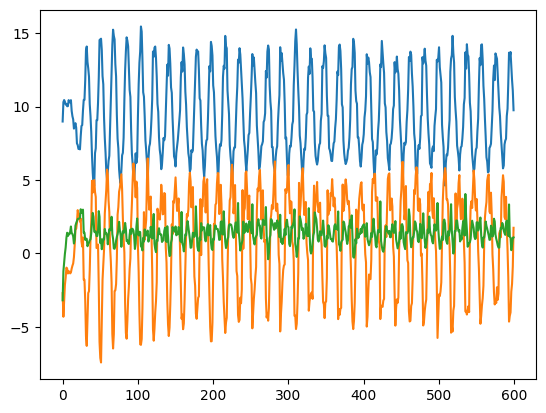

In [ ]:
plt.plot(Xtrain[25,:])

In [ ]:
YtrainIni=np.zeros((90,1))
for i in range(23):
    YtrainIni[i]=0 #front correct

for i in range(23,48):
    YtrainIni[i]=1 # incorrect

for i in range(48,63):
    YtrainIni[i]=2 # no wash

for i in range(63,90):
    YtrainIni[i]=3 # top correct
print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


In [ ]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0.

In [ ]:
XtrainE=(np.expand_dims(Xtrain,2))
YtrainE=(np.expand_dims(Xtrain,2))

['front_correct.4e5gjbut.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gmeem.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gou7c.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gtnor.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gusv0.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5h0a1i.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5h442f.ingestion-65df76d555-xrbth.json', 'front_correct.4e5h51tu.ingestion-65df76d555-5lqbs.json', 'incorrect.top_incorrect.4e5i8l32.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5i93ft.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5ickmd.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5id3cr.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5ifd6d.ingestion-65df76d555-5lqbs.json', 'incorrect.top_incorrect.4e5ifpsq.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5ih4ja.ingestion-65df76d555-5lqbs.json', 'incorrect.top_incorrect.4e5ihhsv.ingestion-65df76d555-dxvr

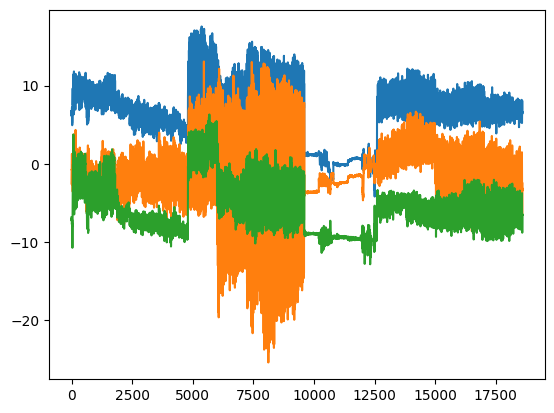

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Universidad/Procesamiento Datos Secuenciales/proyecto_1/wash_teeth_classifier-export/testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*600,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*600:(i+1)*600] = DatosOriNP[0:600]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

In [ ]:
XVal=np.zeros((31,600,3))

for i in range(31):
  XVal[i,:,0]=DatosVal[i*600:(i+1)*600,0].T
  XVal[i,:,1]=DatosVal[i*600:(i+1)*600,1].T
  XVal[i,:,2]=DatosVal[i*600:(i+1)*600,2].T

print(XVal.shape)

(31, 600, 3)


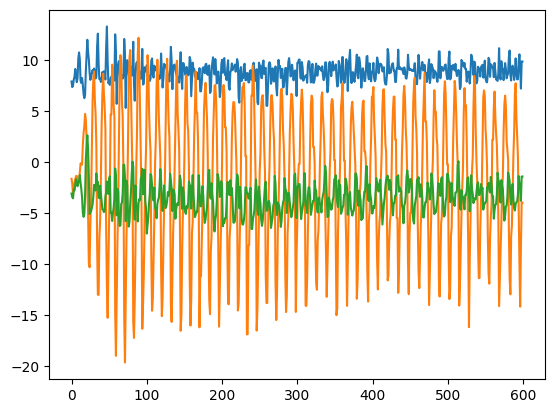

In [ ]:
plt.plot(XVal[10,:])

In [ ]:
YValIni=np.zeros((31,1))
for i in range(8):
    YValIni[i]=0 #front_correct

for i in range(8,16):
    YValIni[i]=1 #incorrect

for i in range(16,21):
    YValIni[i]=2 #no wash

for i in range(21,31):
    YValIni[i]=3 #top correct

print(YValIni)
YVal= to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout,use_bias=False
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    #x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(4, activation = 'softmax')(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = Xtrain.shape[1:]

print(input_shape)
modelo = build_model(
    input_shape,
    head_size=256,
    num_heads=1,
    ff_dim=4,
    num_transformer_blocks=1,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

modelo.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)

modelo.summary()

(600, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600, 3)]             0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 600, 3)               6         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 600, 3)               3072      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                     

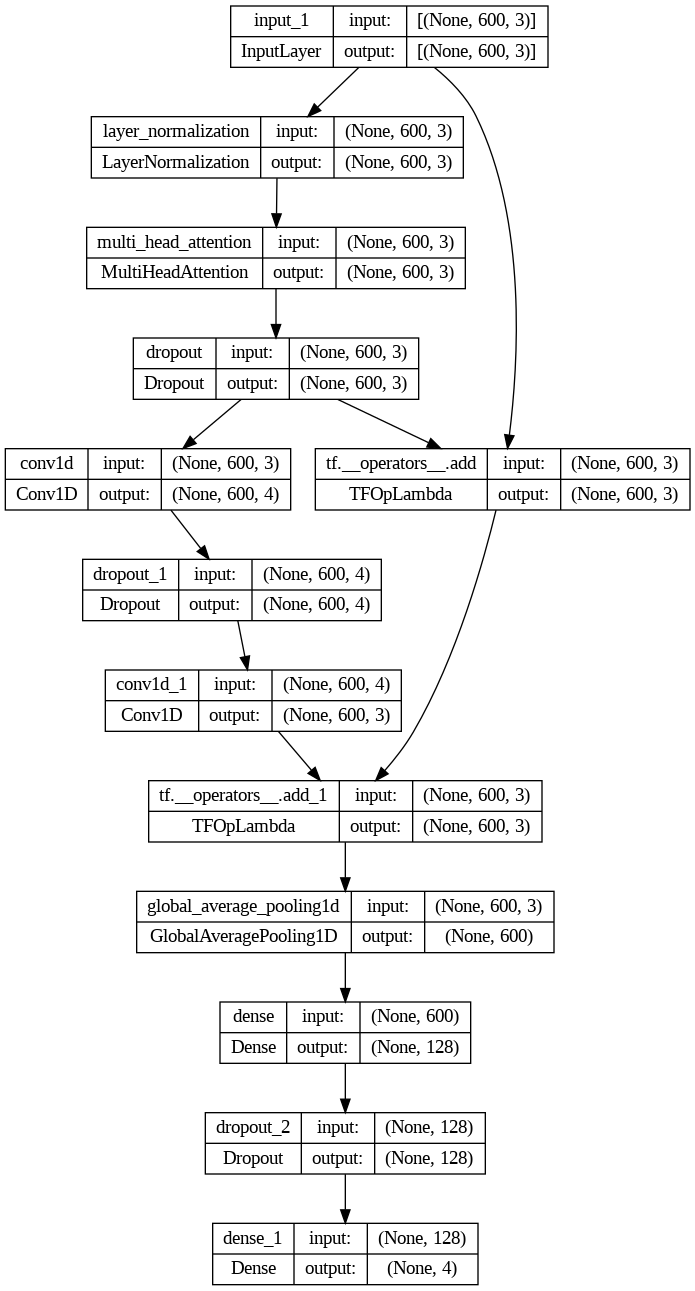

In [ ]:
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.models import load_model

# Supongamos que tu modelo se llama 'modelo' y ya está entrenado
# Guardar el modelo en formato h5
modelo.save('model_3.h5')

# Descargar el modelo a tu máquina local
from google.colab import files
files.download('model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Se entrena el modelo
#historia=modelo.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=200,callbacks=[callback],verbose=0)

historia=modelo.fit(
    x= Xtrain,
    y= Ytrain,
    validation_data=(XVal,YVal),
    #validation_split=0.2,
    epochs=100,
#    batch_size=64,
    callbacks=callback,
)

modelo.evaluate(XVal, YVal, verbose=1)

Epoch 1/100
3/3 [==============================] - 6s 1s/step - loss: 0.2856 - val_loss: 0.2206
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 0.2327 - val_loss: 0.2216
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 0.2300 - val_loss: 0.2073
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.2284 - val_loss: 0.1950
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.2225 - val_loss: 0.2038
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.2122 - val_loss: 0.2110
Epoch 7/100
3/3 [==============================] - 5s 2s/step - loss: 0.1938 - val_loss: 0.2132
Epoch 8/100
3/3 [==============================] - 3s 1s/step - loss: 0.2148 - val_loss: 0.2123
Epoch 9/100
3/3 [==============================] - 3s 1s/step - loss: 0.2010 - val_loss: 0.2099
Epoch 10/100
3/3 [==============================] - 4s 1s/step - loss: 0.1764 - val_loss: 0.2061
Epoch 11/100
3/3 [=====================

0.15145187079906464

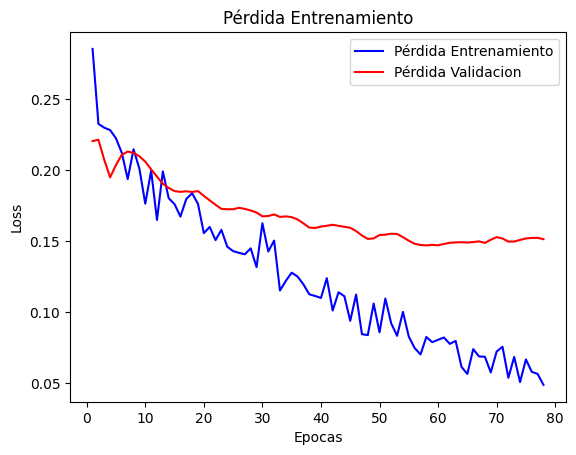

In [ ]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
perdida_test = historia.history['val_loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.plot(epocas, perdida_test, 'r', label='Pérdida Validacion')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Se calcula el MSE del modelo con los datos de testeo
MSE = modelo.evaluate(XVal, YVal)
print("Loss:", MSE)

1/1 [==============================] - 0s 354ms/step - loss: 0.1515
Loss: 0.15145187079906464


1/1 [==============================] - 1s 555ms/step
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.44      0.50      0.47         8
           2       0.50      1.00      0.67         5
           3       0.60      0.30      0.40        10

    accuracy                           0.48        31
   macro avg       0.49      0.54      0.48        31
weighted avg       0.50      0.48      0.46        31

[[3 2 3 0]
 [2 4 0 2]
 [0 0 5 0]
 [2 3 2 3]]


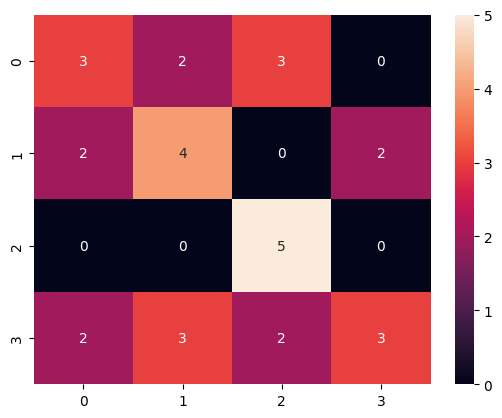

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")